# Frequency Strain Changes

I am analyzing the amplitude over time of the noise signal from specific frequencies; essentially, I will separate a gravitational wave detector into many slices, perform a fourier transform, then get the PSD at a specific frequency. I will do this over time for several minutes of data, then analyze the result.

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from gwpy.timeseries import TimeSeries

# Getting data
min_time = 1263097420
max_time = 1263098020
hdata = hdata = TimeSeries.fetch_open_data('H1', min_time, max_time)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


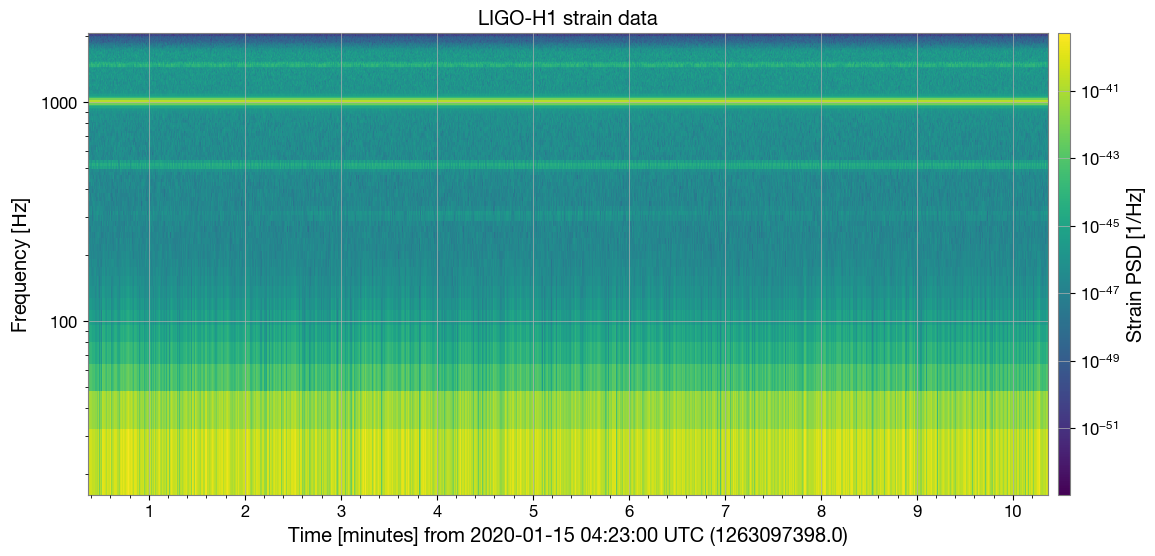

In [70]:
spectrogram = hdata.spectrogram2(fftlength=1/16., overlap=15/256.)
plot = spectrogram.plot(norm='log', cmap='viridis', yscale='log')
ax = plot.gca()
ax.set_title('LIGO-H1 strain data')
ax.colorbar(label=r'Strain PSD [1/Hz]')
plot.show()

In [103]:
# A function for making a frequency-specific strain time series
def freq_specific_time_series(start_time, analysis_length, dt, max_time, freq, fftlength=1/16.):
    lower = start_time
    upper = lower + analysis_length
    values = []
    while (upper <= max_time):
        slice = hdata.crop(lower, upper)
        psd = slice.psd(fftlength=fftlength)
        values += [psd.value_at(freq).value]
        lower += dt
        upper += dt
    return TimeSeries(values, None, start_time, dt)

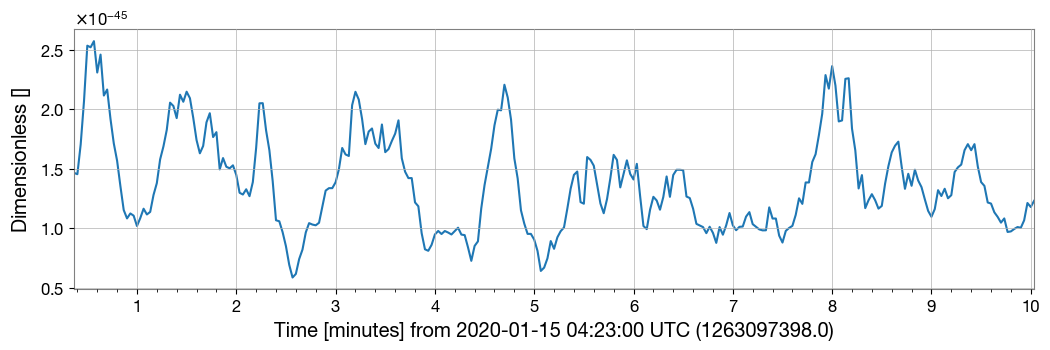

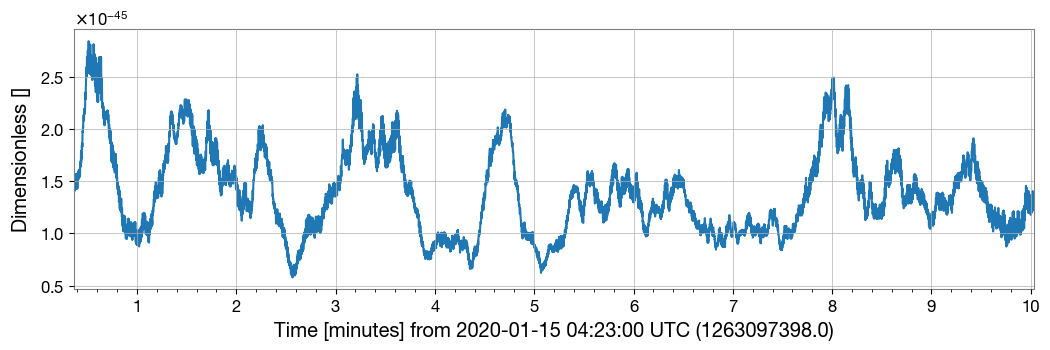

In [104]:
# Showing plots with different dt
fss = freq_specific_time_series(min_time, 20, 2, max_time, 80)
plot1 = fss.plot()
plot1.show()

fss = freq_specific_time_series(min_time, 20, 0.1, max_time, 80)
plot2 = fss.plot()
plot2.show()

# Changing the dt reveals similar plots, but very small dt might be too fine for good analysis.

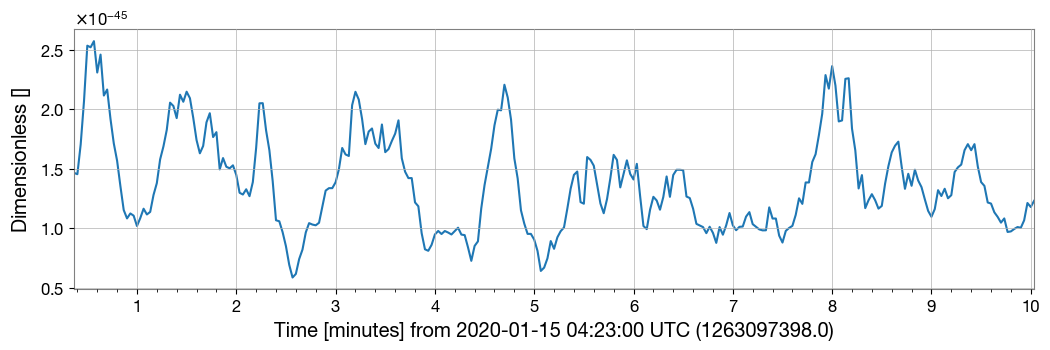

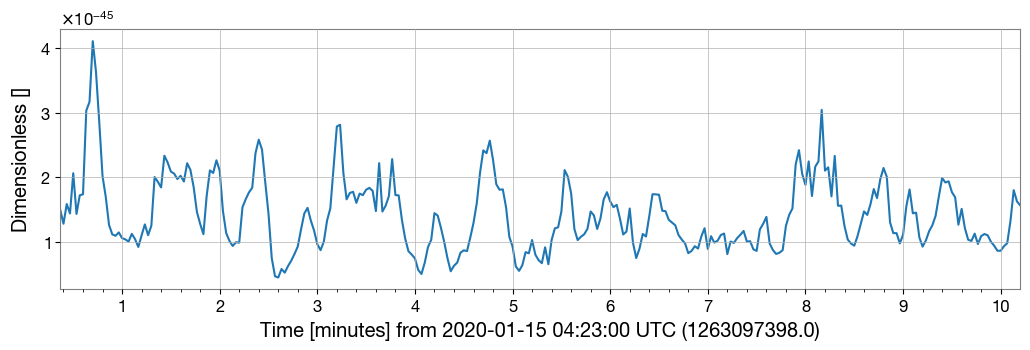

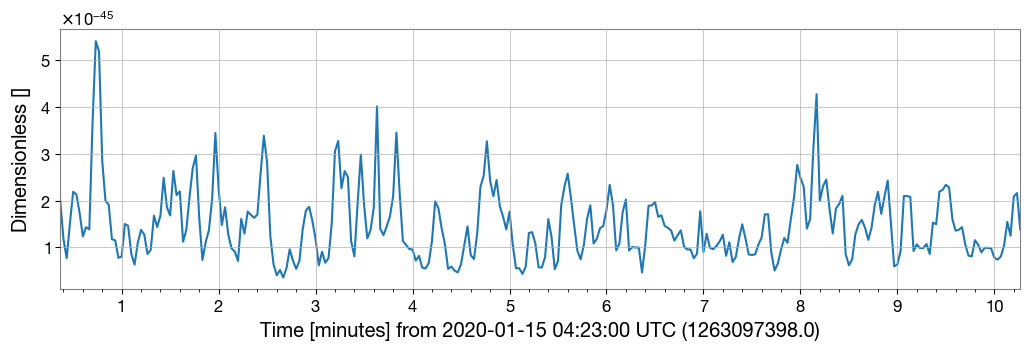

In [106]:
# Showing plots with different analysis lengths
fss = freq_specific_time_series(min_time, 20, 2, max_time, 80)
plot = fss.plot()
plot.show()

fss = freq_specific_time_series(min_time, 10, 2, max_time, 80)
plot = fss.plot()
plot.show()

fss = freq_specific_time_series(min_time, 5, 2, max_time, 80)
plot = fss.plot()
plot.show()

'''
Changing the analysis length can significantly change the features of the plot. Although key parts of it are similar,
such as peaks at the same spot, decreasing the analysis length for the psd generation seems to make the FSS much more
erratic.

KEY QUESTION: How can we identify a good dt and analysis time to use?
'''